# **Data Visualization**

## Objectives

* To meet Business Requirement 1: Visualize the relationship between housing attributes and sale prices.
* Generate plots and visual insights for effective understanding of influential factors.

## Inputs

* house_prices_records.csv: Dataset containing house information in Ames, Iowa.
* inherited_houses.csv: Details of the inherited houses.

## Outputs

* Correlation heatmap of house attributes.
* Scatter plots for selected influential features against SalePrice.
* Box plots for categorical attributes.
* Distribution plots of SalePrice and other numeric features.

## Additional Comments

* The visualizations will be incorporated into the Streamlit dashboard later.

---

# Import Required Libraries

In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")


# Load Data

In [4]:
# Load datasets
data_path = '../data/house_prices_records.csv'
inherited_data_path = '../data/inherited_houses.csv'

houses_df = pd.read_csv(data_path)
inherited_houses_df = pd.read_csv(inherited_data_path)

# Display dataset information
print("Dataset: house_prices_records.csv")
print(houses_df.info())
print(houses_df.head())

print("\nDataset: inherited_houses.csv")
print(inherited_houses_df.info())
print(inherited_houses_df.head())


Dataset: house_prices_records.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    146

# Set Output Directory

In [5]:
# Set the output directory
output_dir = '../outputs/data_visualization'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Output directory {output_dir} created!")
else:
    print(f"Output directory {output_dir} already exists.")


Output directory ../outputs/data_visualization already exists.


# Correlation Heatmap

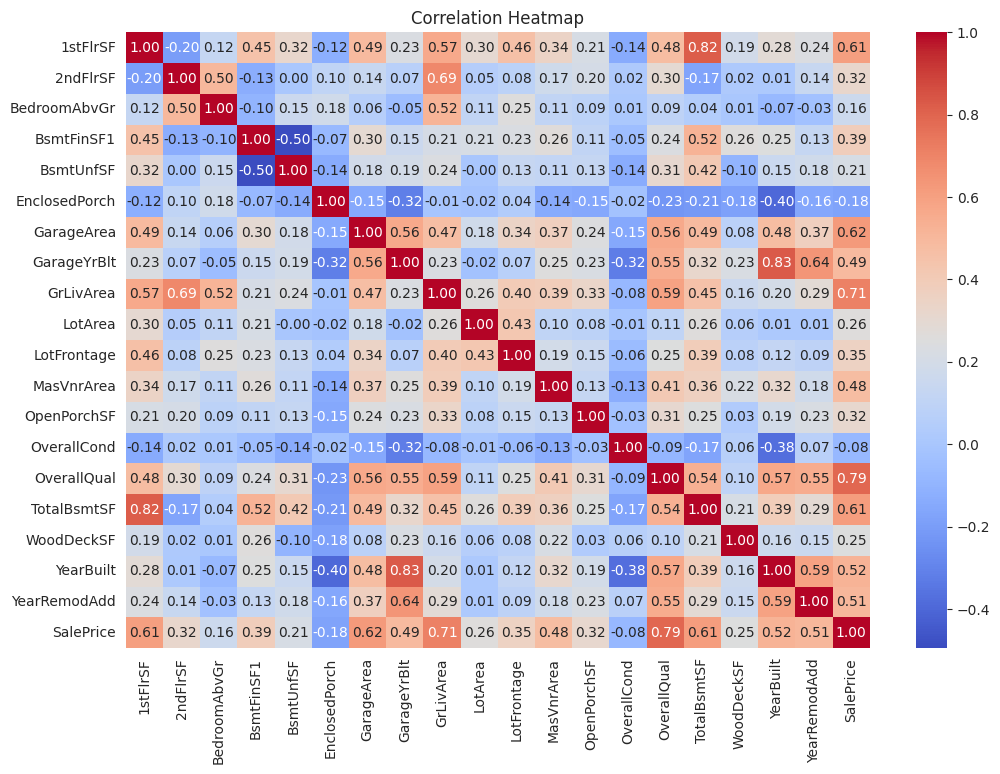

In [8]:
# Select only numeric columns for correlation
numeric_columns = houses_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig(f"{output_dir}/correlation_heatmap.png", bbox_inches='tight')
plt.show()


Additional Check for Missing Values

In [9]:
# Fill missing values with median
houses_df.fillna(houses_df.median(numeric_only=True), inplace=True)

# Scatter Plots for Influential Features

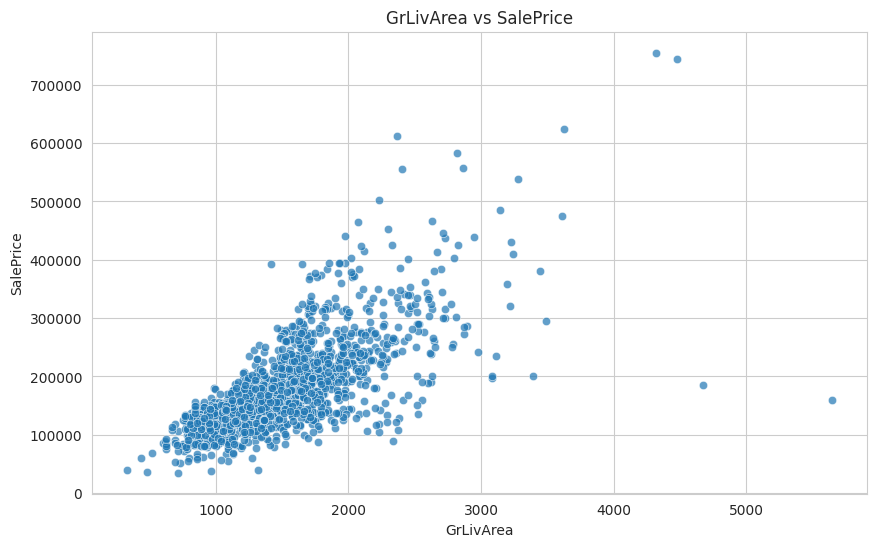

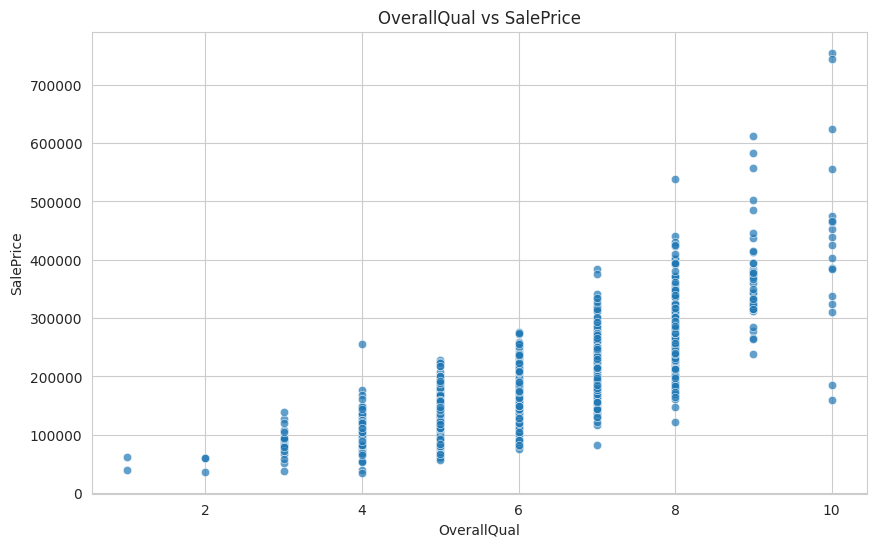

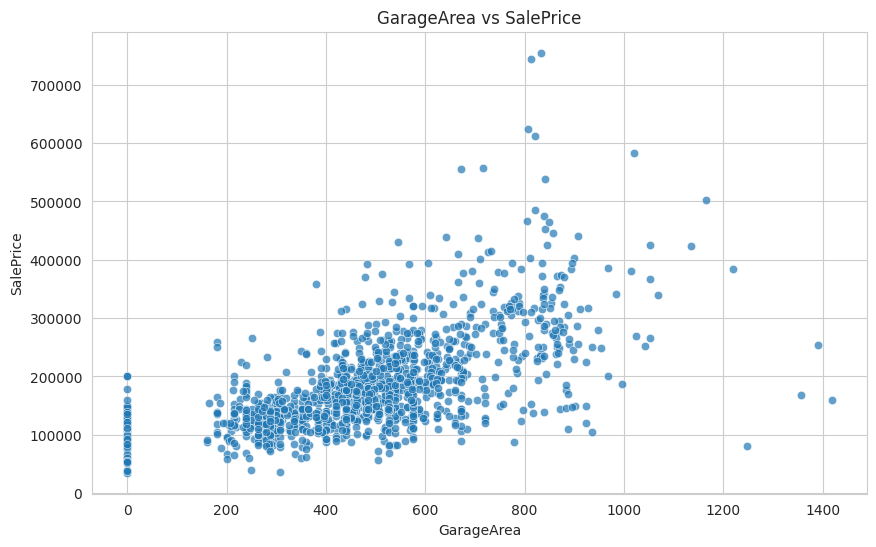

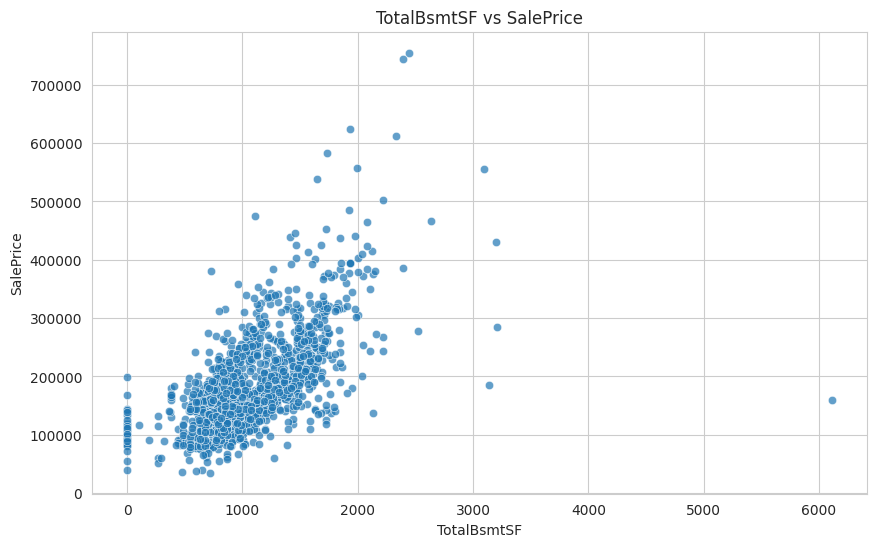

In [10]:
# Select influential features for visualization
influential_features = ['GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF']

for feature in influential_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=houses_df[feature], y=houses_df['SalePrice'], alpha=0.7)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.savefig(f"{output_dir}/{feature}_vs_SalePrice.png", bbox_inches='tight')
    plt.show()


# Box Plots for Categorical Features

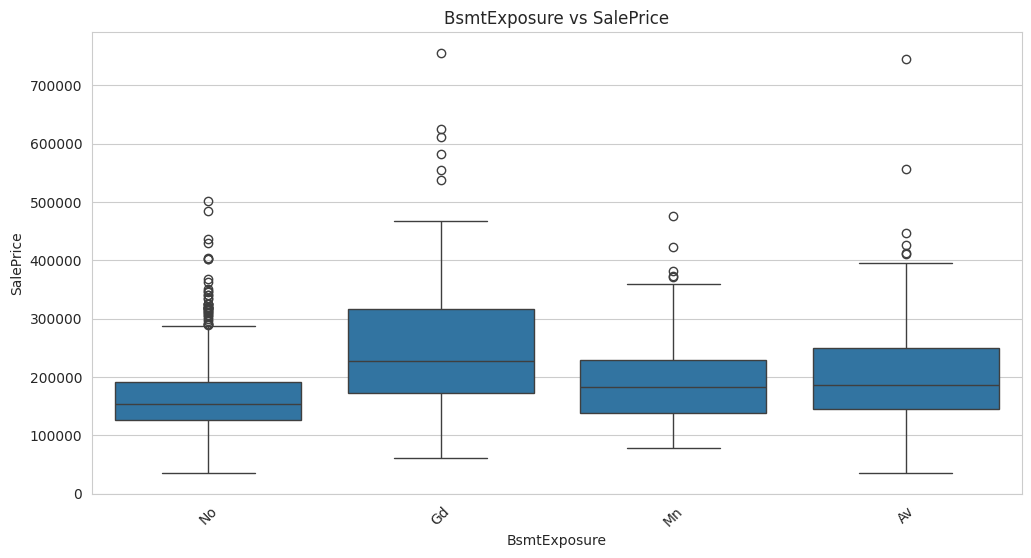

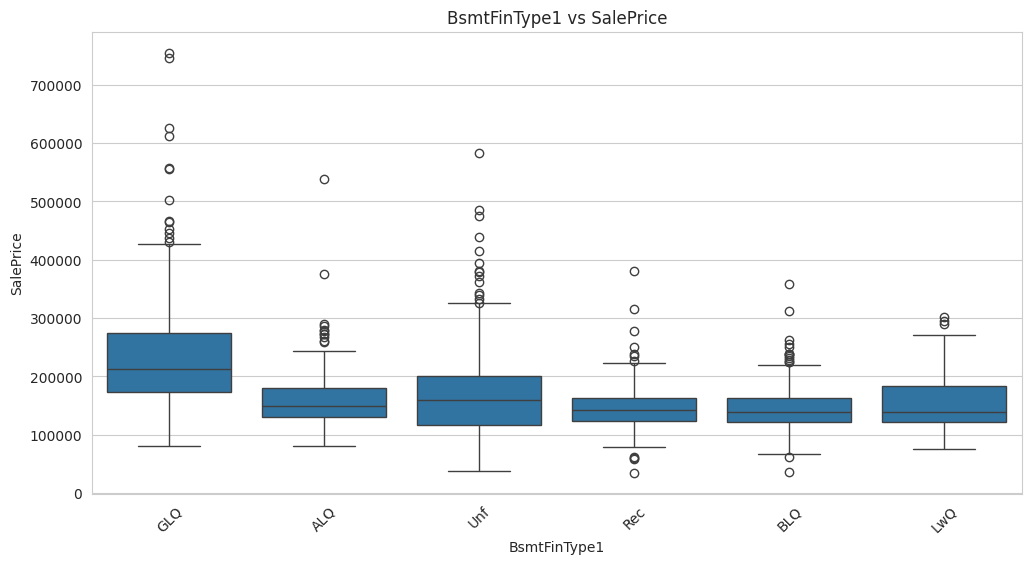

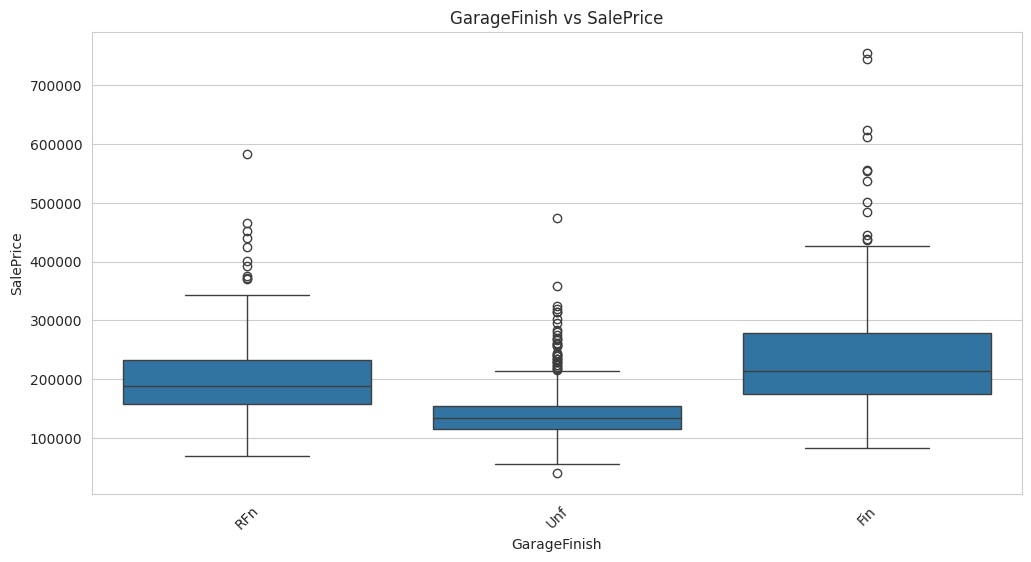

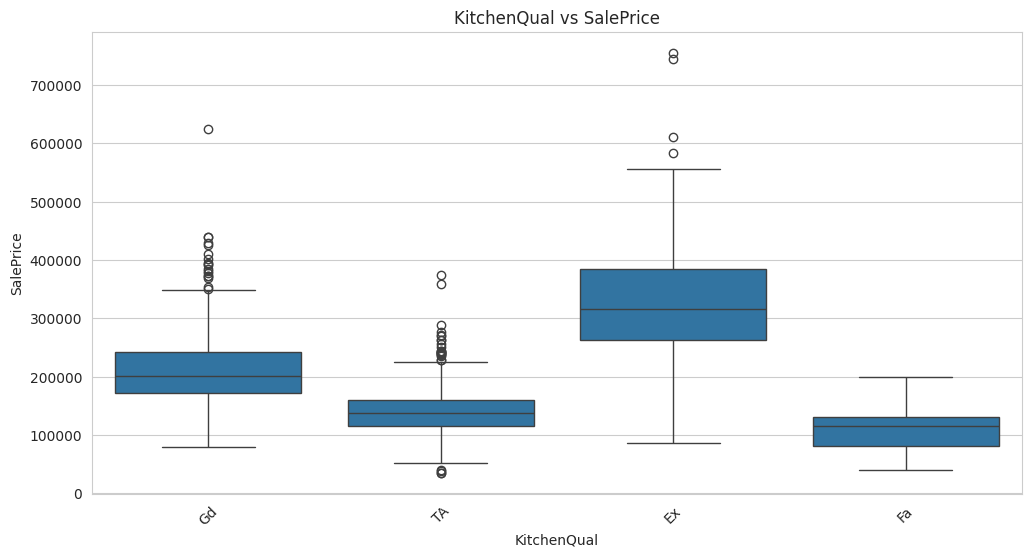

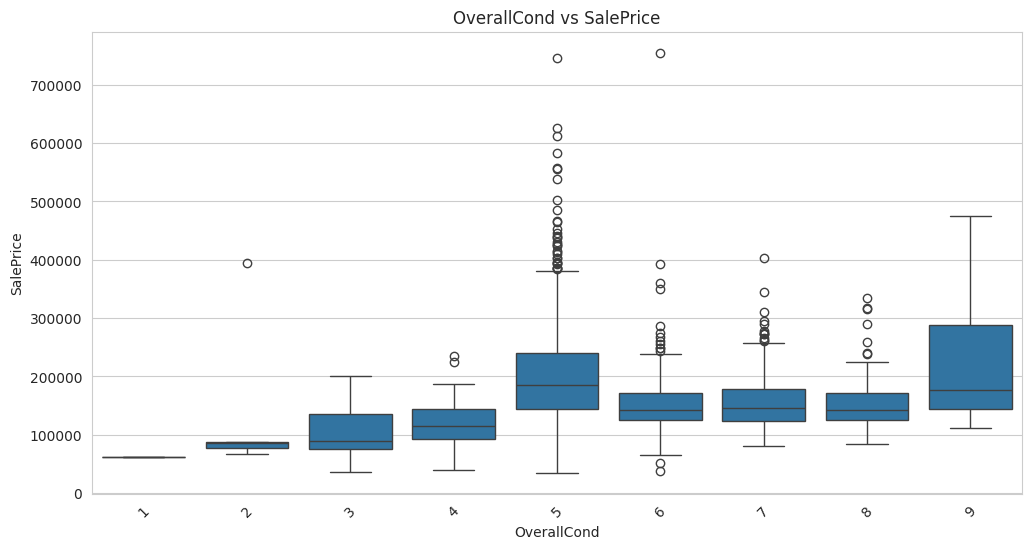

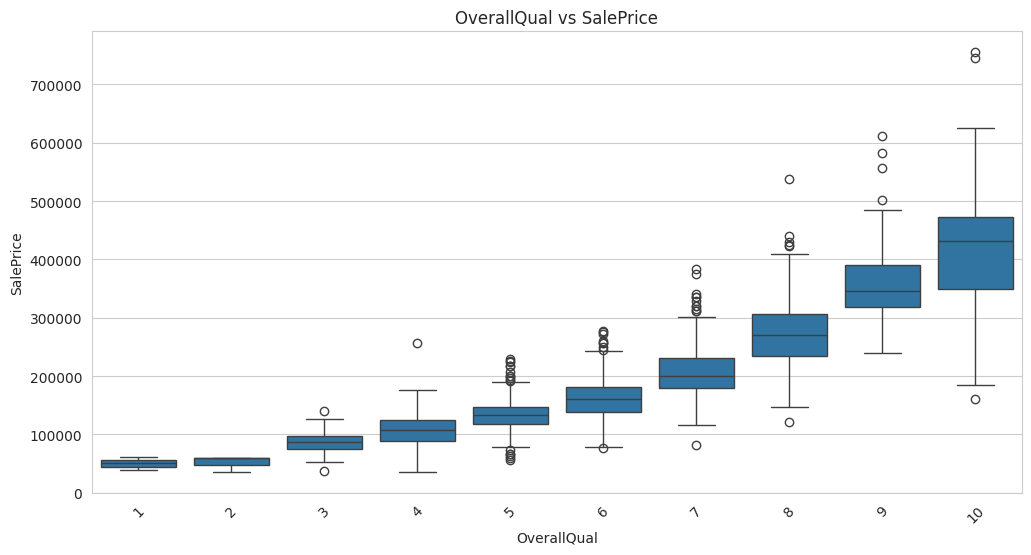

In [12]:
# Define categorical features
categorical_features = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual', 'OverallCond', 'OverallQual']

# Loop through categorical features to create box plots
for feature in categorical_features:
    if feature in houses_df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=houses_df[feature], y=houses_df['SalePrice'])
        plt.title(f'{feature} vs SalePrice')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
    else:
        print(f"Feature {feature} is not in the dataset.")



# Distribution of Sale Price

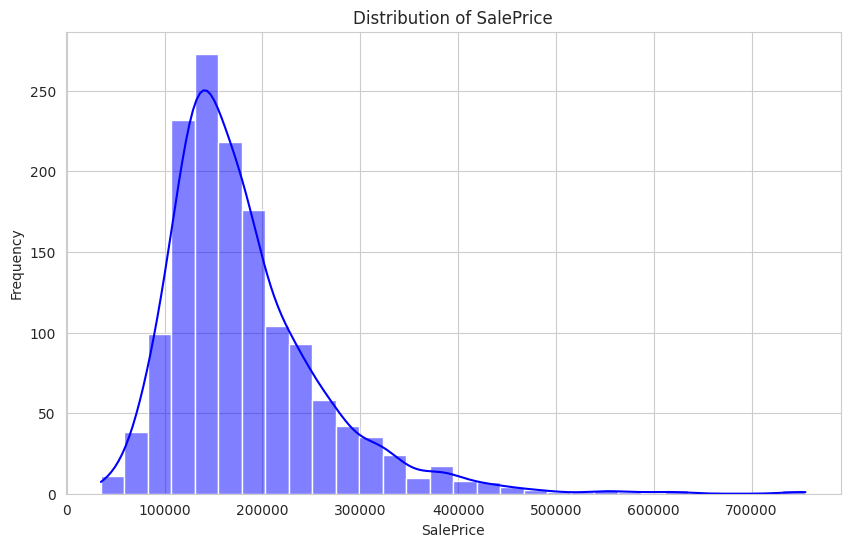

In [13]:
# Plot distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(houses_df['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.savefig(f"{output_dir}/saleprice_distribution.png", bbox_inches='tight')
plt.show()


# Histogram of Numeric Features

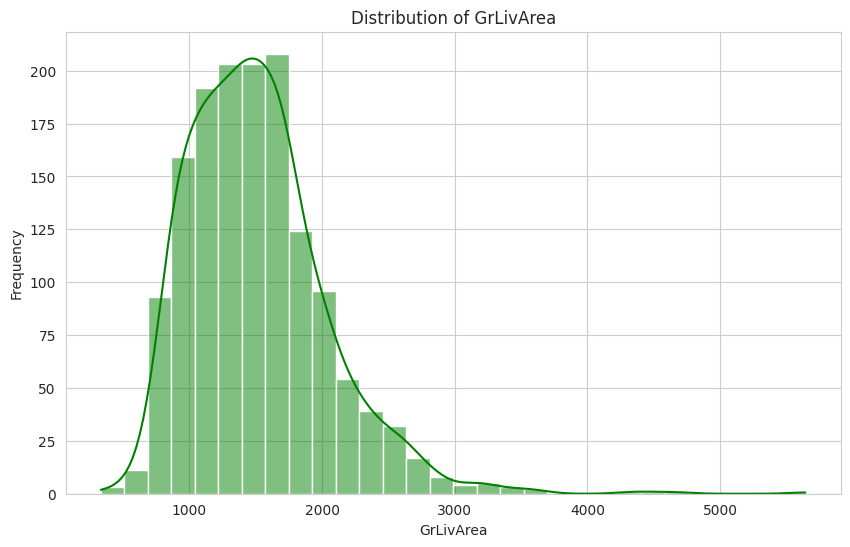

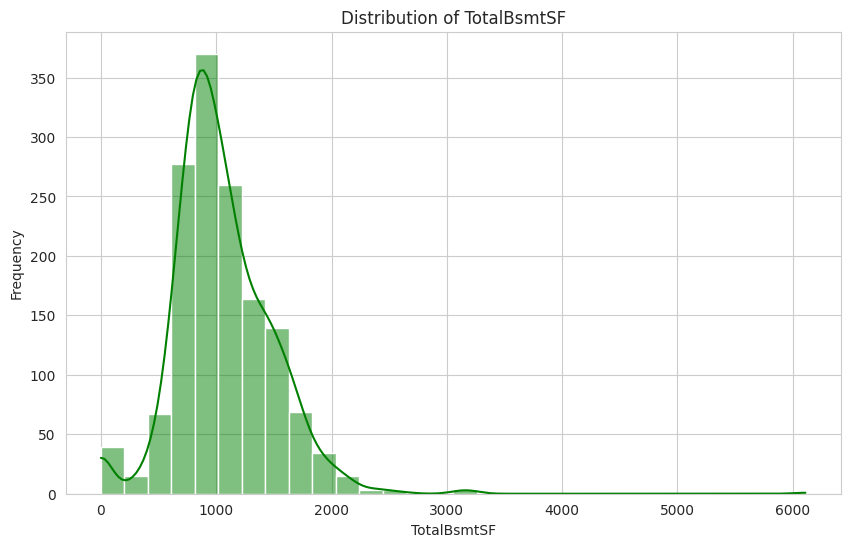

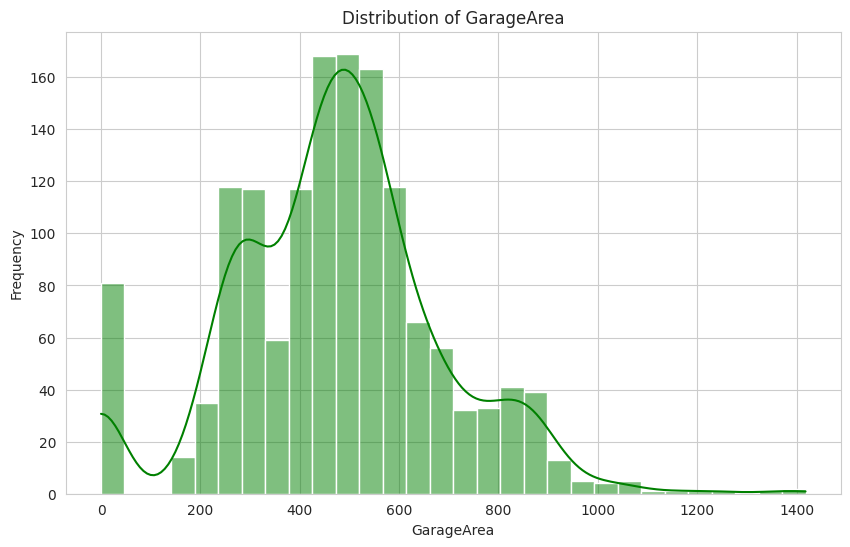

In [14]:
# Select numeric features for visualization
numeric_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(houses_df[feature], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.savefig(f"{output_dir}/{feature}_distribution.png", bbox_inches='tight')
    plt.show()


# Summary of Findings

* Correlation Heatmap: Provided insights into the relationships between key numerical features, highlighting OverallQual, GrLivArea, and GarageArea as highly correlated with SalePrice.
* Box Plots: Displayed distribution and variance of categorical features (BsmtExposure, KitchenQual, etc.) in relation to SalePrice, revealing meaningful trends in specific categories.
